This is a demonstration of chain parser: it parses the m-slices using `emcee` as the smart grid and marginalize over the nuisance parameters.

# Init

In [1]:
from __future__ import division

In [2]:
%load_ext autoreload
%autoreload 2

In [127]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root_scalar

import h5py
import pickle
import glob
import re
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [125]:
import spc
import model
import chi2
import margin
import scan

In [5]:
from matplotlib import rcParams
#rcParams["font.family"] = "Times New Roman"
rcParams['font.size'] = 14

In [6]:
path = '../data/SPARC.txt'
data = spc.readSPARC(path)

path = '../data/SPARC_Lelli2016c.txt'
spc.readSPARC_ext(data, path)

In [35]:
# some benchmarks

## burkert + sol
# m = 1e-24
# M = 10**11.09289247
# ups_bulg = 0.53222657
# ups_disk = 0.03300685
# c = 10**5.45797333
# Rs = 2.42721789

## sol only
# m = 1e-24
# M = 10**6.44194666
# ups_bulg = 3.3962235
# ups_disk = 0.99411498
# c = 1e-2
# Rs = 100

## burkert + sol
# m = 1e-23
# M = 10**9.81873454
# #M = 1e8
# ups_bulg = 1.06925542
# ups_disk = 1.24349238
# c = 10**-0.16492982
# Rs = 14.45240434

## burkert + sol
# m = 1e-23
# M = 5.63674629
# c = 10**5.44270201 
# Rs = 2.76518189
# ups_bulg = 0.1
# ups_disk = 0.1

<IPython.core.display.Javascript object>


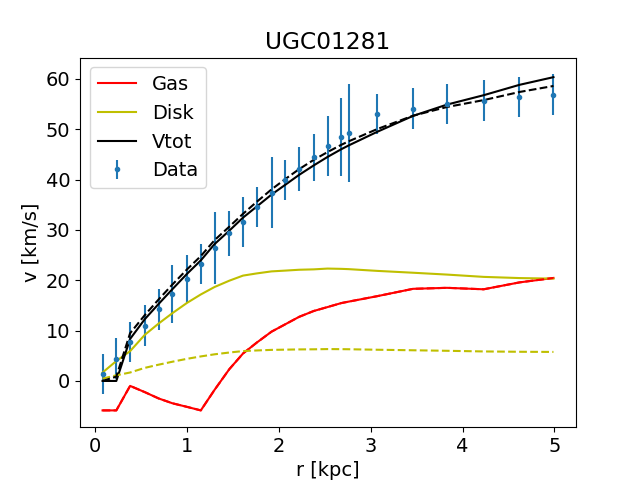

4.396648695507543
3.48305823400669


In [40]:
# observation: Burkert and sol are degenerate

plt.subplots()

name = 'UGC01281';
gal = spc.findGalaxyByName(name, data)
Vtot = np.array([])
plt.errorbar(gal.R, gal.Vobs, gal.dVobs, fmt='.', label='Data')

DM_profile = 'Burkert'
m = 1e-23
M = 10**9.81873454
#M = 1e8
ups_bulg = 1.06925542
ups_disk = 1.24349238
c = 10**-0.16492982
Rs = 14.45240434

chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal, 
                                      flg_Vtot=True, DM_profile=DM_profile)
print(chi2_val)
plt.plot(gal.R, gal.Vgas,'r-', label='Gas')
plt.plot(gal.R, np.sqrt(ups_disk)*gal.Vdisk,'y-', label='Disk')
plt.plot(gal.R, Vtot, 'k-', label='Vtot')





DM_profile = 'Burkert'
m = 1e-23
M = 5.63674629
c = 10**5.44270201 
Rs = 2.76518189
ups_bulg = 0.1
ups_disk = 0.1

chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal, 
                                      flg_Vtot=True, DM_profile=DM_profile)
print(chi2_val)
plt.plot(gal.R, gal.Vgas,'r--')
plt.plot(gal.R, np.sqrt(ups_disk)*gal.Vdisk,'y--')
plt.plot(gal.R, Vtot, 'k--')


plt.legend(loc='best')
plt.xlabel('r [kpc]')
plt.ylabel('v [km/s]')
plt.title('%s' %(gal.name))
plt.savefig('./plots/ugc1281.pdf')

# analyze the chains

The ma slicing result can be checked after the run with the following method:

In [227]:
n_sig = 1.

In [229]:
# sol only
(lst_m_slice_1, 
 lst_M95_upper_1, 
 lst_M95_lower_1, 
 lst_bestfit_1) = margin.m_slicing(runid=16, 
                                   n_sig=n_sig, 
                                   dim_of_param=3, 
                                   verbose=0)

In [241]:
# sol + nfw or sol + Burkert
(lst_m_slice, 
 lst_M95_upper, 
 lst_M95_lower, 
 lst_bestfit) = margin.m_slicing(runid=15, 
                                 n_sig=n_sig, 
                                 dim_of_param=5, 
                                 verbose=0)

-margin.py: logm=-20.0
--margin.py:file /a/home/cc/students/physics/chensun/Code/BEC_dynamics/chains/run_17_ma_20/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 95% CL M upper=10^5.66 Msun
-margin.py: 95% CL M lower=10^nan Msun



-margin.py: logm=-19.0
--margin.py:file /a/home/cc/students/physics/chensun/Code/BEC_dynamics/chains/run_17_ma_19/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 95% CL M upper=10^5.52 Msun
-margin.py: 95% CL M lower=10^nan Msun



-margin.py: logm=-21.0
--margin.py:file /a/home/cc/students/physics/chensun/Code/BEC_dynamics/chains/run_17_ma_21/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'c

if you maginalize only a small set of parameters, e.g. you fix $\Upsilon$ during the run, remember to change the dim_of_param accordingly.

In [231]:
# sol + burkert, fixed Ups
(lst_m_slice_3, 
 lst_M95_upper_3, 
 lst_M95_lower_3, 
 lst_bestfit_3) = margin.m_slicing(runid=18, 
                                   n_sig=n_sig, 
                                   dim_of_param=3, 
                                   verbose=0)

The constraints on $M_{sol}$ can then be plotted out.

<IPython.core.display.Javascript object>


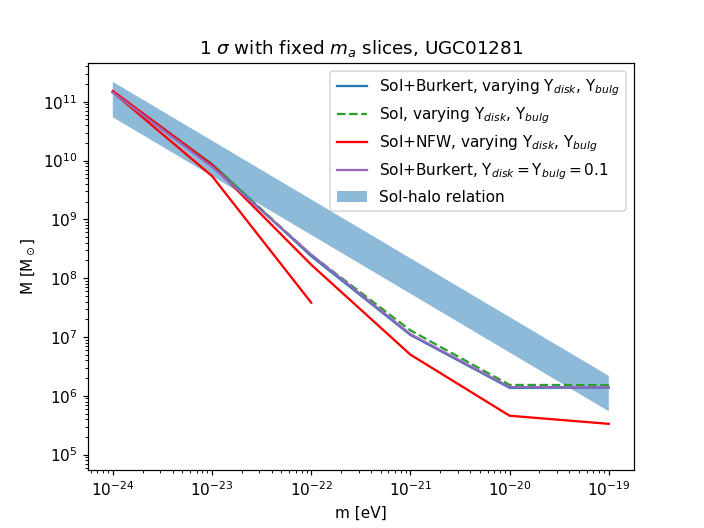

Text(0,0.5,'M [M$_\\odot$]')

In [242]:
lst_m_slice_2, lst_M95_upper_2, lst_M95_lower_2 = zip(*sorted(zip(lst_m_slice_2, lst_M95_upper_2, lst_M95_lower_2)))

lst_m = np.logspace(-24, -19)

plt.subplots()

plt.plot(lst_m_slice, lst_M95_upper, label='Sol+Burkert, varying $\Upsilon_{disk}$, $\Upsilon_{bulg}$')
plt.plot(lst_m_slice, lst_M95_lower)

plt.plot(lst_m_slice_1, lst_M95_upper_1, '--', label='Sol, varying $\Upsilon_{disk}$, $\Upsilon_{bulg}$')
plt.plot(lst_m_slice_1, lst_M95_lower_1)

plt.plot(lst_m_slice_2, lst_M95_upper_2, 'r-', label='Sol+NFW, varying $\Upsilon_{disk}$, $\Upsilon_{bulg}$')
plt.plot(lst_m_slice_2, lst_M95_lower_2, 'r-')

plt.plot(lst_m_slice_3, lst_M95_upper_3, label='Sol+Burkert, $\Upsilon_{disk}=\Upsilon_{bulg}=0.1$')
plt.plot(lst_m_slice_3, lst_M95_lower_3)

#
# comparing with Soliton halo relation
#
# plt.plot(lst_m, (margin.SH_bound(lst_m, gal)), 'k-', label='Sol-halo relation')
# plt.plot(lst_m, (margin.SH_bound(lst_m, gal))*2., 'k--')
# plt.plot(lst_m, (margin.SH_bound(lst_m, gal))/2., 'k--')
plt.fill_between(lst_m, 
                 (margin.SH_bound(lst_m, gal))*2, 
                 (margin.SH_bound(lst_m, gal))/2, 
                 label='Sol-halo relation', 
                 alpha=0.5)

plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.title(r"%d $\sigma$ with fixed $m_a$ slices, %s" %(n_sig, gal.name))
plt.xlabel('m [eV]')
plt.ylabel('M [M$_\odot$]')
#plt.savefig('./output/Mm_%d_%s.pdf' %(n_sig, gal.name))

In [200]:
# check fixing Upsilon

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=18, 
                                                          n_sig=1., 
                                                          dim_of_param=3, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-23.)

print(np.where(min(lst_chi2)==lst_chi2))
print(lst_bf[6])

(array([6]),)
[5.63674629 5.44270201 2.76518189]


<IPython.core.display.Javascript object>


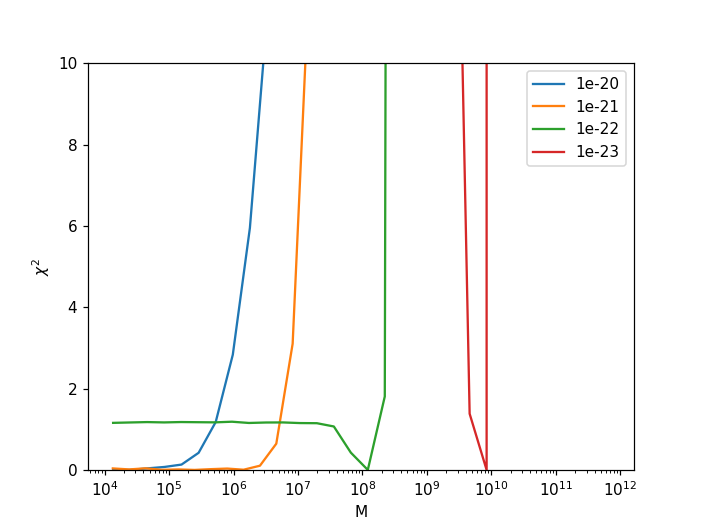

In [243]:
# check the NFW island

plt.subplots()

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-20.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2),  label='1e-20')

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-21.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2),  label='1e-21')


(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-22.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2), label='1e-22')

(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-23.)
plt.plot(10**lst_M, lst_chi2 - min(lst_chi2), label='1e-23')

plt.xscale('log')
#plt.yscale('log')
plt.ylim(0, 10)
plt.xlabel('M')
plt.ylabel('$\chi^2$')
plt.legend(loc='best')

In [223]:
(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing(runid=17, 
                                                          n_sig=1., 
                                                          dim_of_param=5, 
                                                          verbose=0, 
                                                          debug=True,
                                                          debug_logm=-23.)

In [226]:
lst_chi2 - min(lst_chi2)

array([2.45487076e+01, 2.47171639e+01, 2.46259648e+01, 2.48241894e+01,
       2.47390538e+01, 2.45888794e+01, 2.45571037e+01, 2.45912507e+01,
       2.46380427e+01, 2.47168064e+01, 2.46447123e+01, 2.45667355e+01,
       2.46991766e+01, 2.46610259e+01, 2.47236906e+01, 2.46014395e+01,
       2.47794758e+01, 2.47853348e+01, 2.47807314e+01, 2.46061445e+01,
       2.18059466e+01, 1.38199100e+00, 0.00000000e+00, 1.29117070e+04,
       2.22517356e+04, 9.73108124e+04, 2.29117139e+05, 5.53370661e+05,
       1.39812221e+06, 5.15781618e+06])

# Normalize to $M_{SH}$

In [182]:
dct_gal = margin.m_slicing(runid='mslicing_1', 
                        n_sig=2, #3
                        dim_of_param=5, #FIXME
                        multiprocessing=False, 
                        path='../../chains_backup/')

UGC09133
UGC02953
UGC05253
NGC0100
UGC06787
UGC01281
NGC2403
UGC04325


<IPython.core.display.Javascript object>


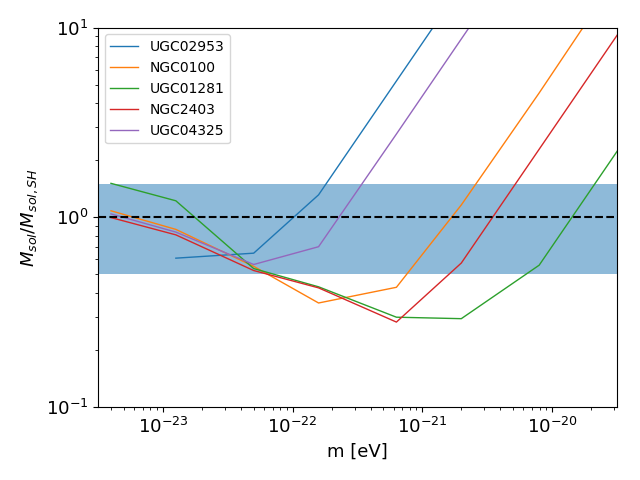

In [189]:
gal_selection = ['NGC2403', 'NGC0100', 'UGC01281', 'UGC04325', 'UGC02953']

plt.subplots()
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams.update({'legend.fontsize': 10})
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.1, 10)
plt.xlim(10**(-23.5), 10**(-19.5))

for galname, gal in dct_gal.items():
    if galname not in gal_selection:
        continue
    gal_details = spc.findGalaxyByName(galname, data)
    Msol_SH = model.M_SH(gal.m, gal_details, ctilde=0.35)
    
    xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
    m = [x for x,_ in xy]
    ratio = [y for _,y in xy]
    plt.plot(m, ratio,'-', linewidth=1, label=galname)
    
    
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [0.5] * 50
yup = [1.5] * 50
plt.fill_between(x, ylow, yup, alpha=0.5)
plt.plot(x, y, 'k--')
plt.legend(loc='best')
plt.xlabel('m [eV]')
plt.ylabel('$M_{sol}/M_{sol, SH}$')
plt.tight_layout()
#plt.savefig('sol_solSH_3sigma.pdf')

In [176]:
dct_gal_Bkt = margin.m_slicing(runid='mslicing_Burkert_2', 
                        n_sig=2,
                        dim_of_param=5,
                        multiprocessing=False, 
                        path='../../chains_new/')

NGC2403
UGC01281
NGC0100
UGC04325


In [177]:
dct_gal_NFW = margin.m_slicing(runid='mslicing_NFW_1', 
                        n_sig=2,
                        dim_of_param=5,
                        multiprocessing=False, 
                        path='../../chains_new/')

NGC2403
UGC09133
NGC0100
UGC04325
UGC01281


### Sigma counting

This is a simple demonstration of $x \;\sigma$ in $n-d$ is converted to the significance in $1d$.

In [15]:
import statistic as stat

In [17]:
for m in range(0,11):
    print("d=2, %d sigma has chi^2=%.2f" %(m, stat.chi1d_to_chind(chi1d=m, d=2)**2))

d=2, 0 sigma has chi^2=0.00
d=2, 1 sigma has chi^2=2.30
d=2, 2 sigma has chi^2=6.18
d=2, 3 sigma has chi^2=11.83
d=2, 4 sigma has chi^2=19.33
d=2, 5 sigma has chi^2=28.74
d=2, 6 sigma has chi^2=40.09
d=2, 7 sigma has chi^2=53.38
d=2, 8 sigma has chi^2=68.64
d=2, 9 sigma has chi^2=85.87
d=2, 10 sigma has chi^2=105.08


In [18]:
for m in range(0,11):
    print("d=3, %d sigma has chi^2=%.2f" %(m, stat.chi1d_to_chind(chi1d=m, d=3)**2))

d=3, 0 sigma has chi^2=0.00
d=3, 1 sigma has chi^2=3.53
d=3, 2 sigma has chi^2=8.02
d=3, 3 sigma has chi^2=14.16
d=3, 4 sigma has chi^2=22.06
d=3, 5 sigma has chi^2=31.81
d=3, 6 sigma has chi^2=43.45
d=3, 7 sigma has chi^2=57.01
d=3, 8 sigma has chi^2=72.50
d=3, 9 sigma has chi^2=89.94
d=3, 10 sigma has chi^2=109.34


# Debug section

Sections below are some outputs that might be useful for debugging.

### Sewing NFW with soliton (debug)

In [265]:
name = 'UGC01281';
c = 20
Rs = 2
ups_bulg = 0.5
ups_disk = 0.5
m = 1e-21 #1e-23
M = 4e7

gal = spc.findGalaxyByName(name, data)
v2_rot, mask_soliton, mask2, truncatd_mass = model.v2_rot(gal, 
             c=c,
             Rs=Rs,
             ups_bulg=ups_bulg,
             ups_disk=ups_disk,
             DM_profile='NFW',
             m=m,
             M=M,
             flg_debug=True)
M_tot = v2_rot * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_

<IPython.core.display.Javascript object>


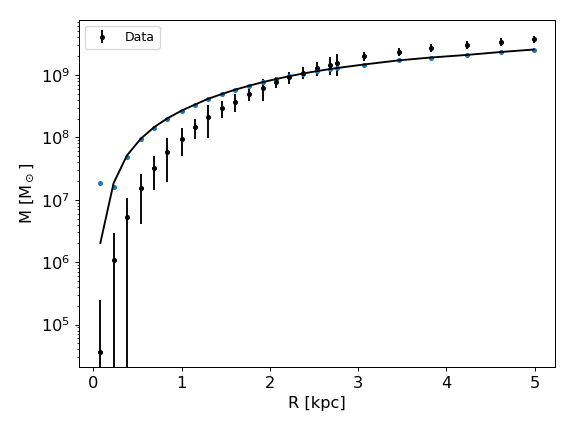

In [269]:
v2_rot, mask_soliton, mask2, truncatd_mass = model.v2_rot(gal, 
             c=c,
             Rs=Rs,
             ups_bulg=ups_bulg,
             ups_disk=ups_disk,
             DM_profile='NFW',
             m=None,
             M=None,
             flg_debug=True)
M_NFW = v2_rot * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_


M_obs = gal.Vobs**2 * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_
dM_obs = 2*gal.Vobs*gal.dVobs * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_


plt.subplots()
plt.plot(gal.R, M_tot, '.')
plt.plot(gal.R, M_NFW, 'k-')
plt.errorbar(gal.R, M_obs, dM_obs, fmt='k.', label='Data')
plt.yscale('log')
plt.legend(loc='best')
plt.ylabel(r'M [M$_\odot$]')
plt.xlabel(r'R [kpc]')
plt.tight_layout()

<IPython.core.display.Javascript object>


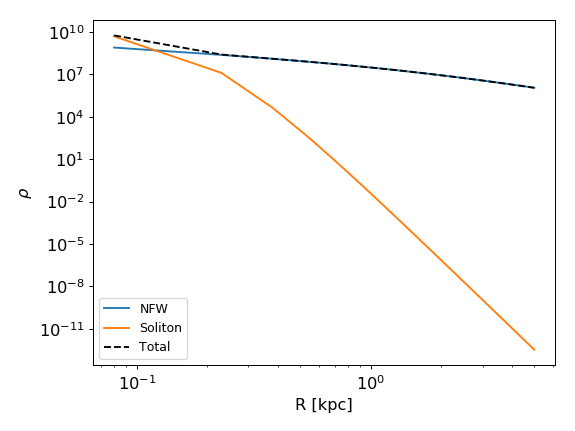

In [273]:
rho_NFW_arr = model.rho_NFW(gal.R, Rs=Rs, c=c)
rho_sol_arr = model.rho_sol(gal.R, m=m, M=M)

plt.subplots()
plt.plot(gal.R, rho_NFW_arr*mask, label='NFW')
plt.plot(gal.R, rho_sol_arr, label='Soliton')
plt.plot(gal.R, rho_NFW_arr*mask+rho_sol_arr, 'k--', label='Total')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$\rho$')
plt.xlabel(r'R [kpc]')
plt.tight_layout()

### Sewing Burkert with soliton (debug)

In [275]:
name = 'UGC01281';
c = 20
Rs = 2
ups_bulg = 0.5
ups_disk = 0.5
m = 1e-21 #1e-23
M = 4e7

gal = spc.findGalaxyByName(name, data)
v2_rot, mask_soliton, mask2, truncatd_mass = model.v2_rot(gal, 
             c=c,
             Rs=Rs,
             ups_bulg=ups_bulg,
             ups_disk=ups_disk,
             DM_profile='Burkert',
             m=m,
             M=M,
             flg_debug=True)
M_tot = v2_rot * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_

<IPython.core.display.Javascript object>


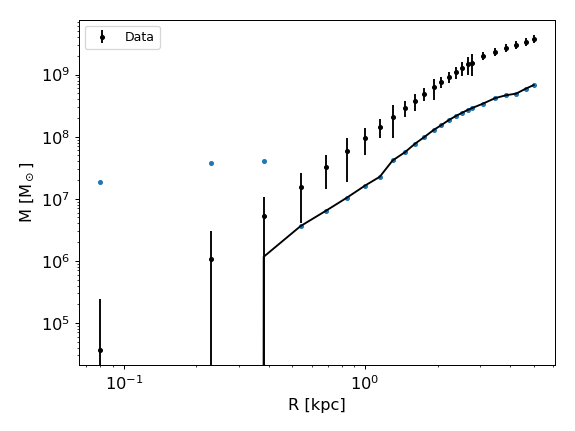

In [279]:
v2_rot, mask_soliton, mask2, truncatd_mass = model.v2_rot(gal, 
             c=c,
             Rs=Rs,
             ups_bulg=ups_bulg,
             ups_disk=ups_disk,
             DM_profile='Burkert',
             m=None,
             M=None,
             flg_debug=True)
M_2 = v2_rot * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_


M_obs = gal.Vobs**2 * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_
dM_obs = 2*gal.Vobs*gal.dVobs * gal.R * model._Mpl2_km2_over_s2_kpc_over_Msun_


plt.subplots()
plt.plot(gal.R, M_tot, '.')
plt.plot(gal.R, M_2, 'k-')
plt.errorbar(gal.R, M_obs, dM_obs, fmt='k.', label='Data')
plt.yscale('log')
plt.legend(loc='best')
plt.ylabel(r'M [M$_\odot$]')
plt.xlabel(r'R [kpc]')
plt.xscale('log')
plt.tight_layout()

<IPython.core.display.Javascript object>


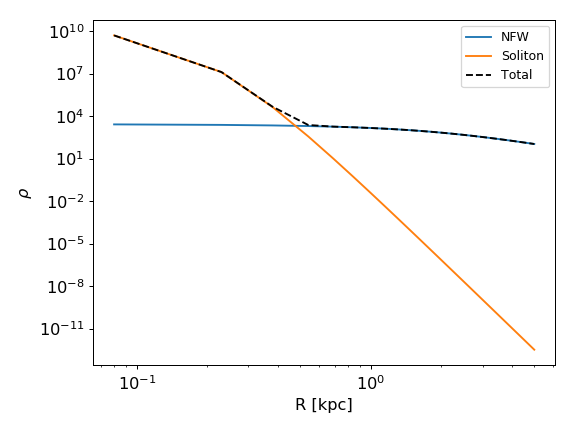

In [278]:
rho_Burkert_arr = model.rho_Burkert(gal.R, Rs=Rs, delc=c)
rho_sol_arr = model.rho_sol(gal.R, m=m, M=M)

plt.subplots()
plt.plot(gal.R, rho_Burkert_arr*mask, label='NFW')
plt.plot(gal.R, rho_sol_arr, label='Soliton')
plt.plot(gal.R, rho_Burkert_arr*mask+rho_sol_arr, 'k--', label='Total')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.ylabel(r'$\rho$')
plt.xlabel(r'R [kpc]')
plt.tight_layout()

### Analyzing the result (debug)

In [152]:
#dct_gal = margin.m_slicing(runid='mslicing_1_NGC0100', 
dct_gal = margin.m_slicing(runid='005_sol_NGC0100', 
                        n_sig=2,
                        dim_of_param=5, #FIXME
                        multiprocessing=False, 
                        #path='../../chains_backup/')
                        path='../../chains/')

NGC0100


In [ ]:
# dct_gal2 = margin.m_slicing(runid='008_sol_NGC2403', 
#                         n_sig=2,
#                         dim_of_param=3, 
#                         multiprocessing=False, 
#                         #path='../../chains_backup/')
#                         path='../../chains/')
# dct_gal.update(dct_gal2)

In [153]:
#dct_gal_Bkt = margin.m_slicing(runid='006_bkt_NGC0100', 
dct_gal_Bkt = margin.m_slicing(runid='010_bkt_NGC0100', 
                        n_sig=2,
                        dim_of_param=5,
                        multiprocessing=False, 
                        path='../../chains/')

NGC0100


In [ ]:
# dct_gal_Bkt2 = margin.m_slicing(runid='007_bkt_NGC2403', 
#                         n_sig=2,
#                         dim_of_param=5,
#                         multiprocessing=False, 
#                         path='../../chains/')
# dct_gal_Bkt.update(dct_gal_Bkt2)

In [154]:
dct_gal_NFW = margin.m_slicing(runid= '004_NFW_NGC0100', #'001_NFW', #'000_NFW', 
                        n_sig=2,
                        dim_of_param=5,
                        multiprocessing=False, 
                        path='../../chains/',
                        num_of_bins=30, 
                        verbose=0)

NGC0100
--margin.py:file ../../chains/run_004_NFW_NGC0100_ma_19.5/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 2.0 sigma M upper=10^7.25 Msun, m=3.2e-20 eV
-margin.py: 2.0 sigma M lower=10^nan Msun, m=3.2e-20 eV
-margin.py: chi2min=16.1
--margin.py: index_bf=6.181812969577931



--margin.py:file ../../chains/run_004_NFW_NGC0100_ma_22.8/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 2.0 sigma M upper=10^9.78 Msun, m=1.6e-23 eV
-margin.py: 2.0 sigma M lower=10^9.22 Msun, m=1.6e-23 eV
-margin.py: chi2min=0.9
--margin.py: index_bf=12.003080212016432



--margin.py:file ../../chains/run_004_NFW_NGC0100_ma_21.5/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chai

-margin.py: 2.0 sigma M upper=10^7.24 Msun, m=1.6e-20 eV
-margin.py: 2.0 sigma M lower=10^nan Msun, m=1.6e-20 eV
-margin.py: chi2min=16.0
--margin.py: index_bf=6.169869331793356



--margin.py:file ../../chains/run_004_NFW_NGC0100_ma_22.0/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 2.0 sigma M upper=10^8.65 Msun, m=1.0e-22 eV
-margin.py: 2.0 sigma M lower=10^nan Msun, m=1.0e-22 eV
-margin.py: chi2min=15.7
--margin.py: index_bf=9.42957982198837



--margin.py:file ../../chains/run_004_NFW_NGC0100_ma_23.8/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 2.0 sigma M upper=10^11.02 Msun, m=1.6e-24 eV
-margin.py: 2.0 sigma M lower=10^10.41 Msun, m=1.6e-24 eV
-ma

In [ ]:
# dct_gal_NFW2 = margin.m_slicing(runid= '009_NFW_NGC2403', #'001_NFW', #'000_NFW', 
#                         n_sig=2,
#                         dim_of_param=5,
#                         multiprocessing=False, 
#                         path='../../chains/',
#                         num_of_bins=30, 
#                         verbose=0)
# dct_gal_NFW.update(dct_gal_NFW2)

Cross check the result with even grid scan on model C. 
Run the following cell to load the scan result from `2_demo_even_grid_scan.ipynb`. Make sure that you have done an even grid scan first with `2_demo_even_grid_scan.ipynb`. 

In [165]:
res_arr[0].sigma_lvl

[1, 2, 3, 4, 5, 10]

<IPython.core.display.Javascript object>


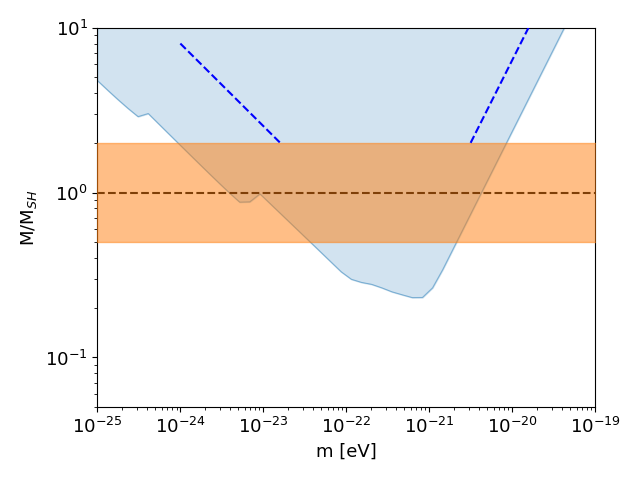

In [167]:
bound_dct = {}
bound_range_dct = {}

plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m [eV]')
plt.ylabel('M/M$_{SH}$')
plt.ylim(0.05, 10)
#plt.xlim(2e-24, 1e-19)
plt.xlim(1e-25, 1e-19)

ratio_upper = 2
ratio_lower = 0.5

M_joint_arr = []
m_joint_arr = []
n_ind = 1

path_wild = '../../results_test11/*'
path_arr = glob.glob(path_wild)
for path in path_arr:
    with open(path, 'r') as f:
        results= pickle.load(f)      
        res_arr = results.storage
        scan.analyze(res_arr, res_arr[0].sigma_lvl)
        
        m_plt_arr = []
        M_plt_arr = []
        for result in res_arr:
            if not result.sane:
                continue            
            m = result.m
            M = result.M_contours[n_ind]
            m_plt_arr.append(m)
            M_plt_arr.append(M)
        
        # the bound
        m_plt_arr = np.asarray(m_plt_arr)        
        Msol_SH_arr = model.M_SH(m_plt_arr, result.gal)
        ratio_arr = M_plt_arr/ Msol_SH_arr
        mask = ratio_arr < ratio_upper * 10        
        if result.gal.name == "NGC0100":
            plt.plot(m_plt_arr, ratio_arr, lw='0.8', color='C0', alpha=0.4)
            m_joint_arr, M_joint_arr = scan.lower_array(m_joint_arr, M_joint_arr, m_plt_arr, ratio_arr)            
            break
        # log the range of m where SH is in tension with SPARC:
        def func(m):
            return np.interp(np.log10(m), np.log10(m_plt_arr), ratio_arr)
        def root1(log10m):
            return func(10**log10m) - 1.
        def root05(log10m):
            return func(10**log10m) - 0.5
        def root2(log10m):
            return func(10**log10m) - 2.
        
        try:
            m_up_sol = root_scalar(root1, method='bisect', bracket=[np.log10(m_plt_arr)[np.argmin(ratio_arr)], np.log10(m_plt_arr)[-1]])
            m_low_sol = root_scalar(root1, method='bisect', bracket=[np.log10(m_plt_arr)[np.argmin(ratio_arr)], np.log10(m_plt_arr)[0]])
            #print(m_up)
        except ValueError:
            continue
        bound_range_dct[result.gal.name] = (m_low_sol, m_up_sol)            
#         # plot out the contour to check
#         mask1 = np.where(m_plt_arr > 10**m_low_sol.root, True, False)
#         mask2 = np.where(m_plt_arr < 10**m_up_sol.root, True, False)
#         mask = mask1 * mask2
#         plt.plot(m_plt_arr[mask], ratio_arr[mask], lw='0.8', color='C0', alpha=0.4)

# the joint bound
plt.fill_between(m_plt_arr, M_joint_arr, 10, color='C0', alpha=0.2)
bound_dct[str(n_ind)] = (m_plt_arr, M_joint_arr)

# the SH prediction
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [ratio_lower] * 50
yup = [ratio_upper] * 50
plt.fill_between(x, ylow, yup, alpha=0.5, color='C1', zorder=3)
plt.plot(x, y, 'k--')

m_test = np.logspace(-24, -22.8)
M_test = 8*(m_test/1e-24)**(-1/2)
plt.plot(m_test, M_test, 'b--', zorder=5)

m_test = np.logspace(-20.5, -19)
M_test = 2.*(m_test/m_test[0])
plt.plot(m_test, M_test, 'b--', zorder=5)

plt.rcParams.update({'font.size': 13})
plt.tight_layout()

#plt.savefig('./plots/sol_full_SPARC_2sigma.pdf')

<IPython.core.display.Javascript object>


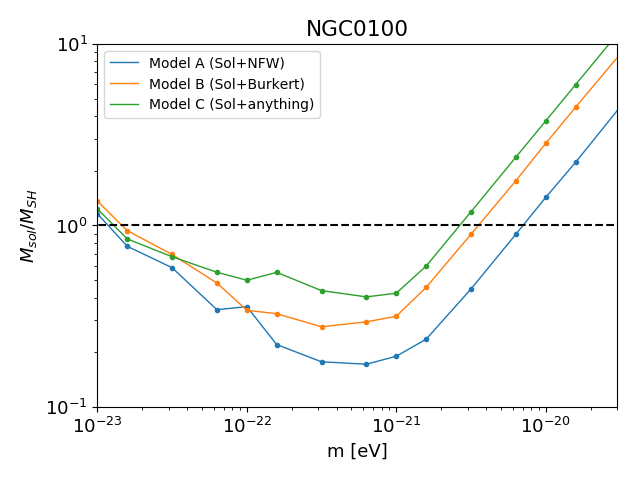

In [254]:
#gal_selection = ['NGC2403', 'NGC0100', 'UGC01281', 'UGC04325', 'UGC02953']


plt.subplots()
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams.update({'legend.fontsize': 10})
plt.xscale('log')
plt.yscale('log')


#galname = 'NGC2403'
#galname = 'UGC01281'
galname = 'NGC0100'
#galname = 'UGC04325'

gal = dct_gal_NFW[galname]
gal_details = spc.findGalaxyByName(galname, data)
Msol_SH = model.M_SH(gal.m, gal_details)

xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
#xy = sorted(zip(gal.m, gal.Mupper))
m = [x for x,_ in xy]
ratio = [y for _,y in xy]
plt.plot(m, ratio,'-', linewidth=1, label='Model A (Sol+NFW)')
plt.plot(m, ratio, '.', color='C0')

    

gal = dct_gal_Bkt[galname]
gal_details = spc.findGalaxyByName(galname, data)
Msol_SH = model.M_SH(gal.m, gal_details)

xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
m = [x for x,_ in xy]
ratio = [y for _,y in xy]
plt.plot(m, ratio,'-', linewidth=1, label='Model B (Sol+Burkert)')
plt.plot(m, ratio, '.', color='C1')



gal = dct_gal[galname]
gal_details = spc.findGalaxyByName(galname, data)
Msol_SH = model.M_SH(gal.m, gal_details)

xy = sorted(zip(gal.m, gal.Mupper/Msol_SH))
m = [x for x,_ in xy]
ratio = [y for _,y in xy]
plt.plot(m, ratio,'-', linewidth=1, label='Model C (Sol+anything)')
plt.plot(m, ratio, '.', color='C2')


# plot the result from even grid scan
#plt.plot(m_plt_arr, ratio_arr, lw='0.8', color='C0', alpha=0.4)



plt.title(galname)
x = np.logspace(-25, -18)
y = [1] * 50
ylow = [0.5] * 50
yup = [1.5] * 50
plt.plot(x, y, 'k--')
plt.legend(loc='best')
plt.xlabel('m [eV]')
plt.ylabel('$M_{sol}/M_{SH}$')
plt.ylim(0.1, 10)
#ymin, _ = plt.ylim()
#plt.ylim(ymin, 10)
plt.xlim(1e-23, 3e-20)
#plt.xlim(1e-25, 3e-20)
plt.tight_layout()
plt.savefig('./plots/Msol_over_MSH_%s.pdf' %galname)

Plot out all the bestfit rotation curves with different $m$

<IPython.core.display.Javascript object>


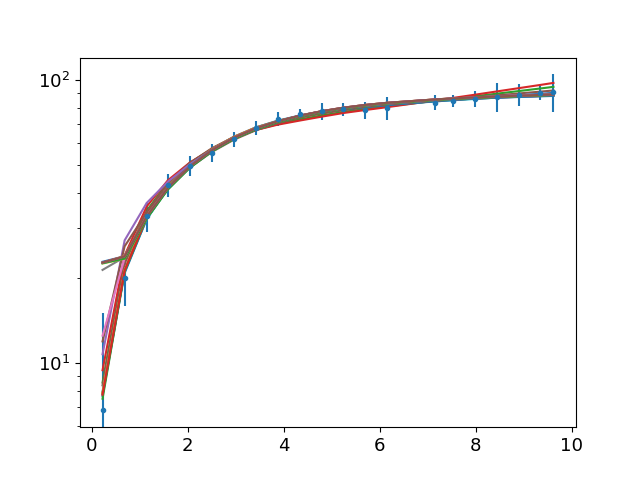


0
m=1.000000e-25
[12.49221534  5.56250876  3.25945642  0.86846507  0.17718626]
chi2=1.384945

12
m=1.584893e-25
[12.33321627  5.54245996  2.68188228  1.87642166  0.31093052]
chi2=4.296530

17
m=3.162278e-25
[11.92605659  5.05427984  3.37543171  4.27881823  0.77488734]
chi2=8.080147

18
m=6.309573e-25
[11.27973058  5.53860247  3.3871784   0.77556795  0.20143075]
chi2=1.363232

3
m=1.000000e-24
[11.10246159  5.52957395  2.98239398  0.66338467  0.29247842]
chi2=2.273124

9
m=1.584893e-24
[10.70110454  5.5432669   3.36406589  1.61446527  0.18340498]
chi2=1.396188

19
m=3.162278e-24
[10.2717616   5.53719861  3.35885355  3.94224539  0.19002734]
chi2=1.416519

24
m=6.309573e-24
[9.8618362  5.52229685 3.37550904 4.96654313 0.20424726]
chi2=1.479958

23
m=1.000000e-23
[ 9.86050774  4.28337812 52.67319221  2.93169123  0.44929529]
chi2=1.053980

6
m=1.584893e-23
[9.57085997 4.80319023 9.61570844 0.72039267 0.32402342]
chi2=1.048647

7
m=3.162278e-23
[9.03778377 5.24763324 5.04090053 3.72808355 0

In [246]:
#result = dct_gal_NFW[galname]
result = dct_gal_Bkt[galname]
gal = spc.findGalaxyByName(galname, data)
R_arr = np.logspace(gal.R[0], gal.R[-1], 100)

plt.subplots()
plt.errorbar(gal.R, gal.Vobs, gal.dVobs, fmt='.', label='Data')


#for i in range(len(result.m)):
result.m = np.array(result.m)
mask1 = np.where(result.m<1e-21, True, False)
#mask2 = np.where(result.m>2e-22, True, False)
mask2 = np.where(result.m>3e-23, True, False)
#mask = mask1 * mask2
mask = [True] * len(result.m)
#print(mask)

index_of_m_arr = range(len(result.m))
_, index_of_m_arr = zip(*sorted(zip(result.m, index_of_m_arr)))


for counter,i in enumerate(index_of_m_arr):
    if mask[i] == True:
        #DM_profile = 'NFW'
        DM_profile = 'Burkert'
        m = result.m[i]
        M = result.Mupper[i]
        bestfit_arr = result.bestfit[i]
        M = 10**bestfit_arr[0]
        #c = bestfit_arr[1]
        c = 10**bestfit_arr[1]
        Rs = bestfit_arr[2]
        ups_bulg = bestfit_arr[3]
        ups_disk = bestfit_arr[4]
        print('\n%d' %i)
        print('m=%e' %m)
        print(bestfit_arr)

        chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal,  
                                              flg_Vtot=True, DM_profile=DM_profile)    
        # construct the rot curve for the best fit
        if not np.isnan(c):
            plt.plot(gal.R, Vtot, '-')
            print('chi2=%f' %chi2_val)

#plt.xscale('log')
plt.yscale('log')

In [69]:
(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing_single_gal(result, n_sig=2, dim_of_param=5, verbose=5, num_of_bins=20, flg_debug=True, flg_debug_breakpt=28)
#margin.m_slicing_single_gal(result, n_sig=2, dim_of_param=5, verbose=5, num_of_bins=20, flg_debug=True, flg_debug_breakpt=-1) #22

--margin.py:file ../../chains/run_002_NFW_NGC0100_ma_19.0/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 2.0 sigma M upper=10^7.22 Msun, m=1.0e-19 eV
-margin.py: 2.0 sigma M lower=10^nan Msun, m=1.0e-19 eV
-margin.py: chi2min=16.0
--margin.py: index_bf=12.197745313922157





Visualize $\Delta \chi^2$ as a function of $M_{sol}$

In [217]:
(lst_M, lst_chi2, point_count, lst_bf) = margin.m_slicing_single_gal(result, n_sig=2, dim_of_param=5, verbose=5, num_of_bins=30, flg_debug=True, flg_debug_breakpt=12)#7,14,1,6,12 #28)

--margin.py:file ../../chains/run_006_bkt_NGC0100_ma_24.8/chain_1.h5 has keys: [u'mcmc']
--margin.py:raw_chain has keys: [u'accepted', u'blobs', u'chain', u'log_prob']
--margin.py:log_prob has shape: (30000, 100)
--margin.py:chains have shape: (30000, 100, 5)
-margin.py: 2.0 sigma M upper=10^12.55 Msun, m=1.6e-25 eV
-margin.py: 2.0 sigma M lower=10^nan Msun, m=1.6e-25 eV
-margin.py: chi2min=1.4
--margin.py: index_bf=19.00001529692166





In [218]:
# check the interpolation
index_of_chi2min = np.where(lst_chi2 == 0.)
index_of_chi2min = np.asarray(list(index_of_chi2min)).reshape(-1)

if len(index_of_chi2min) == 1:
    index_of_chi2min = np.squeeze(index_of_chi2min.reshape(-1))
else:
    # just get the last zero, could be problematic
    index_of_chi2min = index_of_chi2min[-1]
    if verbose > 1:
        print("-margin.py: There are %d minima in the global chi-square!!!!" %
              len(index_of_chi2min))


chi2_arr = np.logspace(-2, 8)
check_M_arr = np.interp(np.log10(chi2_arr+0.01), np.log10(lst_chi2[index_of_chi2min:]+0.01), lst_M[index_of_chi2min:], left=np.nan, right=np.nan)
M_pt = np.interp(np.log10(2**2+0.01), np.log10(lst_chi2[index_of_chi2min:]+0.01), lst_M[index_of_chi2min:], left=np.nan, right=np.nan)

<IPython.core.display.Javascript object>


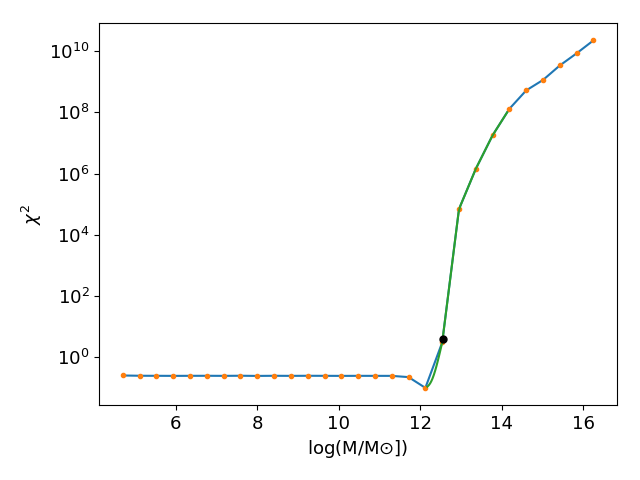

In [219]:
# plt.subplots()
# plt.plot(lst_M, lst_chi2, '.')
# plt.xscale('log')
# #plt.yscale('log')
# plt.ylim(0, 100)

plt.subplots()
plt.plot(lst_M, lst_chi2+0.1, '-')
plt.plot(lst_M, lst_chi2+0.1, '.')
#plt.xscale('log')
plt.yscale('log')
#plt.ylim(0, 100)

# check the interpolation
plt.plot(check_M_arr, chi2_arr+0.1, '-')
plt.plot(M_pt, 4.01, 'k.', markersize=10)
#plt.plot(lst_M, lst_chi2+0.1, '.')
# end of interpolation check

#plt.title('m=%.1e eV' %7.9e-22)
plt.ylabel('$\chi^2$')
plt.xlabel('log(M/M$\odot$])')
plt.tight_layout()

<IPython.core.display.Javascript object>


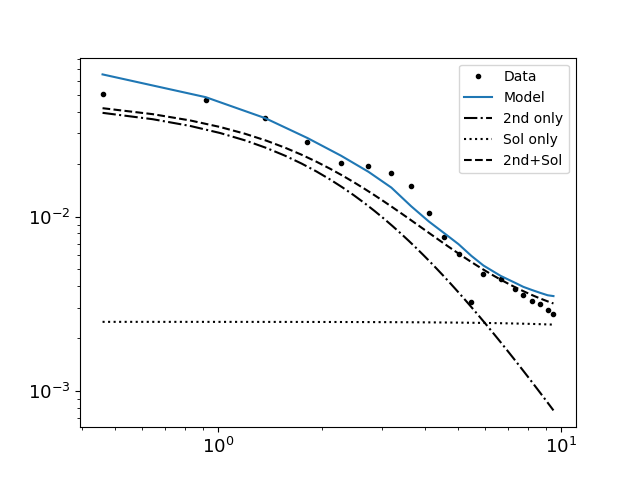

6.309573444801943e-20

12
m=1.584893e-25
[12.33321627  5.54245996  2.68188228  1.87642166  0.31093052]


In [252]:
#result = dct_gal_NFW[galname]
result = dct_gal_Bkt[galname]
gal = spc.findGalaxyByName(galname, data)
r_mid_arr, rho_arr, drho_arr = model.reconstruct_density_total(gal, flg_give_R=True, interpol_method='nearest', flg_errorbar=True)

plt.subplots()
#plt.errorbar(gal.R, gal.Vobs, gal.dVobs, fmt='.', label='Data')
#plt.errorbar(r_mid_arr, rho_arr, drho_arr, fmt='.', label='Data')
plt.plot(r_mid_arr, rho_arr, 'k.', label='Data')


result.m = np.array(result.m)
index_of_m_arr = range(len(result.m))
_, index_of_m_arr = zip(*sorted(zip(result.m, index_of_m_arr)))


for counter,i in enumerate(index_of_m_arr):
    if i == 12:
        #DM_profile = 'NFW'
        DM_profile = 'Burkert'
        m = result.m[i]
        print(result.m[14])
        #M = result.Mupper[i]
        bestfit_arr = result.bestfit[i]
        #M = 1e8
        M = 10**bestfit_arr[0]
        c = 10**bestfit_arr[1]
        Rs = bestfit_arr[2]
        ups_bulg = bestfit_arr[3]
        ups_disk = bestfit_arr[4]
        print('\n%d' %i)
        print('m=%e' %m)
        print(bestfit_arr)

        chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal,  
                                              flg_Vtot=True, DM_profile=DM_profile)    
        r_mid_arr, rho_arr = model.reconstruct_density_total(gal, flg_give_R=True, interpol_method='nearest', flg_errorbar=False, Vth=Vtot)
        plt.plot(r_mid_arr, rho_arr, '-', label='Model')
        #plt.plot(r_mid_arr, rho_arr, 'b.')
        r_arr = np.linspace(r_mid_arr[0], r_mid_arr[-1])
        #rho_2nd_arr = model.rho_NFW(r_arr, Rs=Rs, c=c)/1e9 #[Msun/pc**3]
        rho_2nd_arr = model.rho_Burkert(r_arr, Rs=Rs, delc=c)/1e9 #[Msun/pc**3]
        rho_sol_arr = model.rho_sol(r_arr, m=m, M=M)/1e9 #[Msun/pc**3]
        plt.plot(r_arr, (rho_2nd_arr), 'k-.', label='2nd only')
        plt.plot(r_arr, (rho_sol_arr), 'k:', label='Sol only')
        plt.plot(r_arr, (rho_2nd_arr+rho_sol_arr), 'k--', label='2nd+Sol')

plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')

<IPython.core.display.Javascript object>


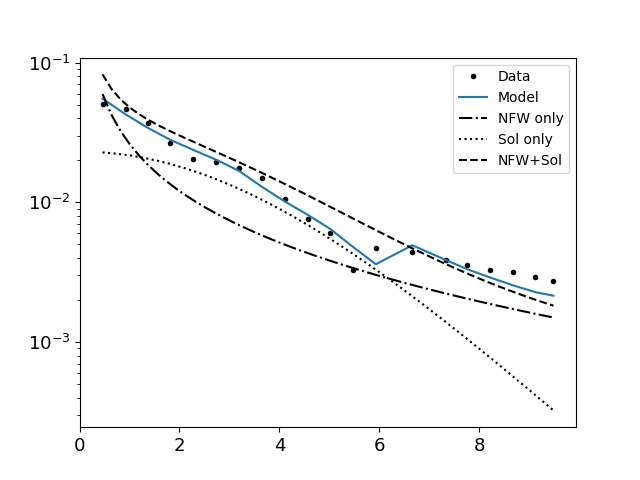


6
m=7.943282e-24
[10.02477306  5.12712124 22.75970505  2.3116684   0.44436225]
mask: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [25]:
result = dct_gal_NFW[galname]
gal = spc.findGalaxyByName(galname, data)
r_mid_arr, rho_arr, drho_arr = model.reconstruct_density_total(gal, flg_give_R=True, interpol_method='nearest', flg_errorbar=True)

plt.subplots()
plt.plot(r_mid_arr, rho_arr, 'k.', label='Data')


result.m = np.array(result.m)
index_of_m_arr = range(len(result.m))
_, index_of_m_arr = zip(*sorted(zip(result.m, index_of_m_arr)))


for counter,i in enumerate(index_of_m_arr):
    if i == 6:
        DM_profile = 'NFW'
        m = result.m[i]
        #M = result.Mupper[i]
        bestfit_arr = result.bestfit[i]
        #M = 1e8
        M = 10**bestfit_arr[0]
        c = bestfit_arr[1]
        Rs = bestfit_arr[2]
        ups_bulg = bestfit_arr[3]
        ups_disk = bestfit_arr[4]
        print('\n%d' %i)
        print('m=%e' %m)
        print(bestfit_arr)

        #chi2_val, Vtot = chi2.chi2_single_gal(m, M, c, Rs, ups_disk, ups_bulg, gal,  
        #                                      flg_Vtot=True, DM_profile=DM_profile)    
        Vtot = np.sqrt(model.v2_rot(gal, c, Rs, ups_bulg,
                            ups_disk, DM_profile, m=m, M=M))
        r_mid_arr, rho_arr = model.reconstruct_density_total(gal, flg_give_R=True, interpol_method='nearest', flg_errorbar=False, Vth=Vtot)
        plt.plot(r_mid_arr, rho_arr, '-', label='Model')
        #plt.plot(r_mid_arr, rho_arr, 'b.')
        r_arr = np.linspace(r_mid_arr[0], r_mid_arr[-1])
        rho_NFW_arr = model.rho_NFW(r_arr, Rs=Rs, c=c)/1e9 #[Msun/pc**3]
        rho_sol_arr = model.rho_sol(r_arr, m=m, M=M)/1e9 #[Msun/pc**3]
        plt.plot(r_arr, (rho_NFW_arr), 'k-.', label='NFW only')
        plt.plot(r_arr, (rho_sol_arr), 'k:', label='Sol only')
        plt.plot(r_arr, (rho_NFW_arr+rho_sol_arr), 'k--', label='NFW+Sol')
        
#         # fake model with soliton only
#         Vtot = np.sqrt(model.v2_rot(gal, c=0.0001, Rs=Rs, ups_bulg=ups_bulg,
#                             ups_disk=ups_disk, DM_profile=DM_profile, m=m, M=M))
#         r_mid_arr, rho_arr = model.reconstruct_density_total(gal, flg_give_R=True, interpol_method='nearest', flg_errorbar=False, Vth=Vtot)
#         plt.plot(r_mid_arr, rho_arr, '--', label='fake model, test\nrho reconstru')        

plt.legend(loc='best')
#plt.xscale('log')
plt.yscale('log')

In [47]:
M

7731954.354431585

In [48]:
model.M_sol(4, m, M)

7731938.494072876

# Test: numerical densit reconstruction

<IPython.core.display.Javascript object>


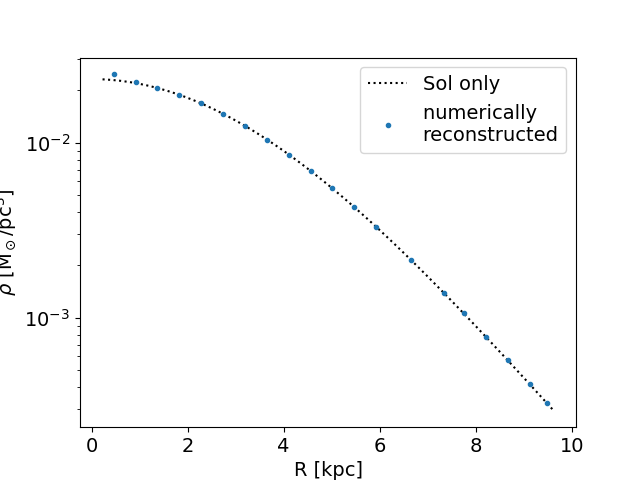

Text(0.5,0,'R [kpc]')

In [14]:
gal = spc.findGalaxyByName('NGC0100', data)

plt.subplots()
DM_profile = 'NFW'
m = 7.943282347242789e-24
M = 10587003660.997885

r_arr = np.linspace(gal.R[0], gal.R[-1])
rho_sol_arr = model.rho_sol(r_arr, m=m, M=M)/1e9 #[Msun/pc**3]
plt.plot(r_arr, (rho_sol_arr), 'k:', label='Sol only')
        
# fake model with soliton only
Vtot = np.sqrt(model.v2_rot(gal, c=0.0001, Rs=0.1, ups_bulg=1,
                    ups_disk=1, DM_profile=DM_profile, m=m, M=M, flg_baryon=False))
r_mid_arr, rho_arr = model.reconstruct_density_total(gal, flg_give_R=True, interpol_method='nearest', flg_errorbar=False, Vth=Vtot)
plt.plot(r_mid_arr, rho_arr, '.', label='numerically \nreconstructed')        


plt.legend(loc='best')
plt.yscale('log')
plt.ylabel(r'$\rho$ [M$_\odot$/pc$^3$]')
plt.xlabel('R [kpc]')